In [1]:
#online resource: https://www.analyticsvidhya.com/blog/2022/04/predicting-possible-loan-default-using-machine-learning/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.naive_bayes import GaussianNB #to build naive bayes model
from sklearn.preprocessing import LabelEncoder # converts categorical features into numbers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
import matplotlib.pyplot as plt #data visualization library: charts, graphs etc
import seaborn as sns #another data visualization library
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [3]:
#read the data from the csv file
# Need to add the data file in the .csv format to build and train a new model. The training data is not included in this project.
# MAKE SURE THE file path is correct before running this code block. the file name is 'training_dataset.csv'.
# this training data can be replaced with your own clean dataset to build new models. Make sure to retain the same format in the file.
data = pd.read_csv('/AI_ML_Project/GITHub/training_dataset.csv')

data.head()

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
0,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,Yes
1,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
2,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,No
3,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,Yes
4,75 and above,988.23,1269.00,Regular Job,0,200.0,2,AL,0.094807,No


In [4]:
#shows the data
data

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
0,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,Yes
1,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
2,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,No
3,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,Yes
4,75 and above,988.23,1269.00,Regular Job,0,200.0,2,AL,0.094807,No
...,...,...,...,...,...,...,...,...,...,...
151699,36 to 45,10.69,5600.00,Regular Job,0,530.0,2,MI,0.106948,No
151700,56 to 65,901.64,3800.00,Other,0,600.0,2,MI,0.178055,No
151701,46 to 55,8.18,1936.00,Retired / Pension,0,300.0,2,MI,0.176968,No
151702,46 to 55,23.82,803.50,Social Security,0,250.0,2,AL,0.365588,No


In [5]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 151704
Columns: 10


In [6]:
#shows the information about the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151704 entries, 0 to 151703
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age_range                     151704 non-null  object 
 1   bank_balance                  151704 non-null  float64
 2   customer_monthly_income       151704 non-null  float64
 3   employment_type               151704 non-null  object 
 4   isDueDateAllignedWithPayDate  151704 non-null  int64  
 5   loan_amount                   151704 non-null  float64
 6   marital_status                151704 non-null  int64  
 7   store_state                   151704 non-null  object 
 8   percentagePmtAboveIncome      151704 non-null  float64
 9   isOntimePayment               151704 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 11.6+ MB


In [7]:
#sanity check. after all the data cleaning, make sure there are no null values left in the dataset
data.isnull().sum()

#data.isnull().sum()*100 / len(data)  -- use this line to find the percentage of missing data in the dataframe for each column

age_range                       0
bank_balance                    0
customer_monthly_income         0
employment_type                 0
isDueDateAllignedWithPayDate    0
loan_amount                     0
marital_status                  0
store_state                     0
percentagePmtAboveIncome        0
isOntimePayment                 0
dtype: int64

In [8]:
data[data.duplicated()]   # Shows records which are duplicated

# ignoring the duplicated records here. because this is not the right place to check this. 
# This step needs to take place on the raw-data and not on the cleaned dataset. 

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
6,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,Yes
7,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
10,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
11,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
14,66 to 75,25.00,962.00,Social Security,0,500.0,1,AL,0.147089,No
...,...,...,...,...,...,...,...,...,...,...
151693,66 to 75,9.50,1536.28,Retired / Pension,0,200.0,2,NM,0.031537,No
151694,66 to 75,9.50,1536.28,Retired / Pension,0,200.0,2,NM,0.031537,No
151700,56 to 65,901.64,3800.00,Other,0,600.0,2,MI,0.178055,No
151701,46 to 55,8.18,1936.00,Retired / Pension,0,300.0,2,MI,0.176968,No


In [9]:
len(data[data.duplicated()]) # count of records that are duplicated. ignore this step

112859

In [10]:
#shows the column names
data.columns

Index(['age_range', 'bank_balance', 'customer_monthly_income',
       'employment_type', 'isDueDateAllignedWithPayDate', 'loan_amount',
       'marital_status', 'store_state', 'percentagePmtAboveIncome',
       'isOntimePayment'],
      dtype='object')

In [11]:
# computes and displays summary statistics for each column in the dataset. 
# it summarizes a set of observations, in order to communicate the largest amount of information as simply as possible
# it helps to understand the data distribution 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age_range,151704,7,66 to 75,32632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_balance,151704.0,NaN,NaN,NaN,575.079841,1807.729758,0.01,24.95,166.84,607.7,47116.33
customer_monthly_income,151704.0,NaN,NaN,NaN,3331.127024,2321.926977,250.04,1298.0,2946.8,4726.0,9996.0
employment_type,151704,6,Regular Job,78509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isDueDateAllignedWithPayDate,151704.0,NaN,NaN,NaN,0.170688,0.376237,0.0,0.0,0.0,0.0,1.0
loan_amount,151704.0,NaN,NaN,NaN,685.860691,460.813576,25.0,400.0,500.0,900.0,4500.0
marital_status,151704.0,NaN,NaN,NaN,1.687371,0.509069,1.0,1.0,2.0,2.0,3.0
store_state,151704,14,NM,72691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentagePmtAboveIncome,151704.0,NaN,NaN,NaN,0.087901,0.11825,0.0,0.018891,0.04715,0.110947,1.879699
isOntimePayment,151704,2,No,92838,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#this is just another way of displaying summary statistics 
data.describe()

,bank_balance,customer_monthly_income,isDueDateAllignedWithPayDate,loan_amount,marital_status,percentagePmtAboveIncome
count,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000
mean,575.079841,3331.127024,0.170688,685.860691,1.687371,0.087901
std,1807.729758,2321.926977,0.376237,460.813576,0.509069,0.118250
min,0.010000,250.040000,0.000000,25.000000,1.000000,0.000000
25%,24.950000,1298.000000,0.000000,400.000000,1.000000,0.018891
50%,166.840000,2946.800000,0.000000,500.000000,2.000000,0.047150
75%,607.700000,4726.000000,0.000000,900.000000,2.000000,0.110947
max,47116.330000,9996.000000,1.000000,4500.000000,3.000000,1.879699


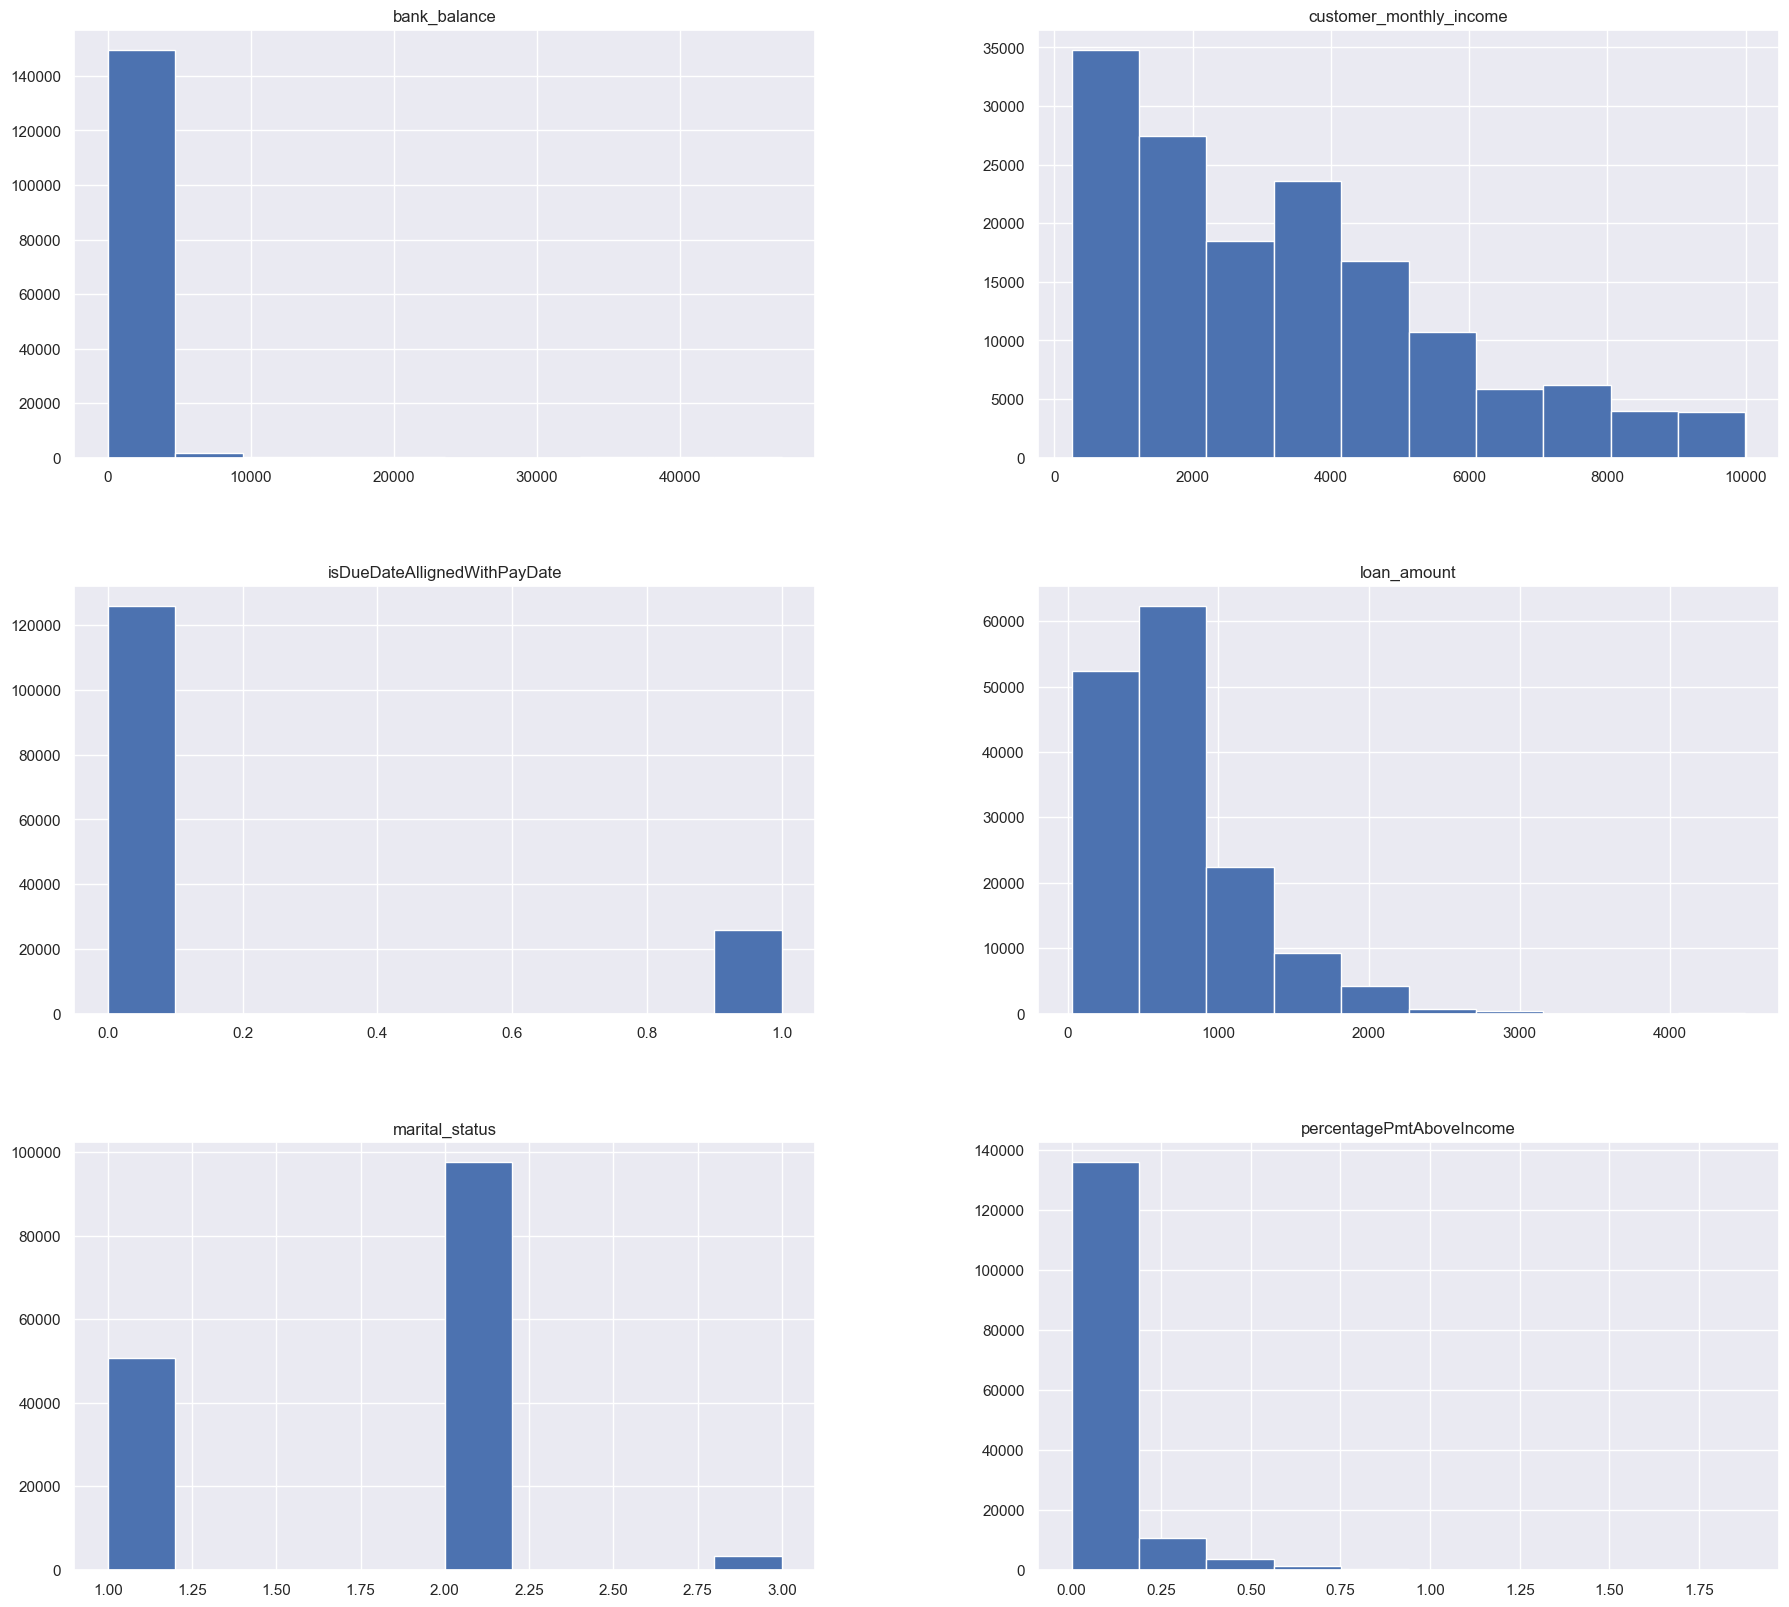

In [13]:
# visualization of the data distribution using histogram charts
data.hist( figsize = (22, 20) )
plt.show()

In [17]:
# Run this to Profile dataset (dataframe)
# performs an automated Exploratory Data Analysis
# It automatically generates a dataset profile report that gives valuable insights
# For example, we can know which variables to use and which ones we can drop using the profile report

#import pandas_profiling as pp

#data
#profile = pp.ProfileReport(data, title="Loan repayment profiles", html={"style": {"full_width": True}}, sort=None)
#profile



In [18]:
# Load your data into a pandas DataFrame
# this is to help import the data and send it to stake holders who may be interested in analysing their data
# it also helps for record keeping and to study how the data is behaving over the period of time

#report = pp.ProfileReport(data)
#report.to_file("data_report.html")

In [14]:
# a data to understand more about the target label / target attribute / class label
# how many data rows show on-time payment (Yes) and how many data rows show not on-time payments (No)
data["isOntimePayment"].value_counts()

No     92838
Yes    58866
Name: isOntimePayment, dtype: int64

In [15]:
data

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
0,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,Yes
1,46 to 55,25.00,5455.92,Regular Job,0,100.0,1,AL,0.011181,No
2,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,No
3,56 to 65,395.29,1916.00,Regular Job,0,200.0,1,AL,0.062792,Yes
4,75 and above,988.23,1269.00,Regular Job,0,200.0,2,AL,0.094807,No
...,...,...,...,...,...,...,...,...,...,...
151699,36 to 45,10.69,5600.00,Regular Job,0,530.0,2,MI,0.106948,No
151700,56 to 65,901.64,3800.00,Other,0,600.0,2,MI,0.178055,No
151701,46 to 55,8.18,1936.00,Retired / Pension,0,300.0,2,MI,0.176968,No
151702,46 to 55,23.82,803.50,Social Security,0,250.0,2,AL,0.365588,No


In [16]:
# analyize the categorical value count to know how many customers have made ontime pmt in the past
# if everyone made ontime payment then stop the project here!
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

No     92838
Yes    58866
Name: isOntimePayment, dtype: int64


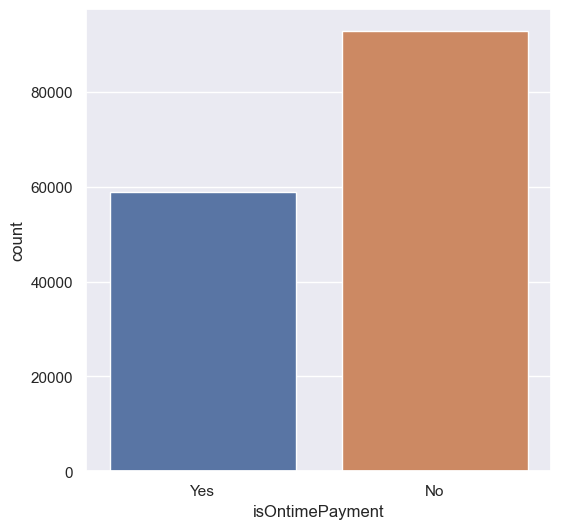

In [17]:
categorical_valcount_hist("isOntimePayment")

In [23]:
# dropping column 'payment_amount_due' because it is positively correlated to loan_amount and %aboveIncome
#data.drop(columns=["payment_amount_due"], inplace=True)

In [18]:
# Normalize labels: convert features/variables that are categorical and boolean into numerical labels. 
le_c = LabelEncoder()
data['age_range'] = le_c.fit_transform(data['age_range'])
classes_c = le_c.classes_

#data['gender'] = le_c.fit_transform(data['gender'])
#classes_c = le_c.classes_

data['store_state'] = le_c.fit_transform(data['store_state'])
classes_c = le_c.classes_

data['employment_type'] = le_c.fit_transform(data['employment_type'])
classes_c = le_c.classes_

#data['payment_method'] = le_c.fit_transform(data['payment_method'])
#classes_c = le_c.classes_

C:\Users\Soumya\AppData\Local\Temp\ipykernel_12304\2398510030.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


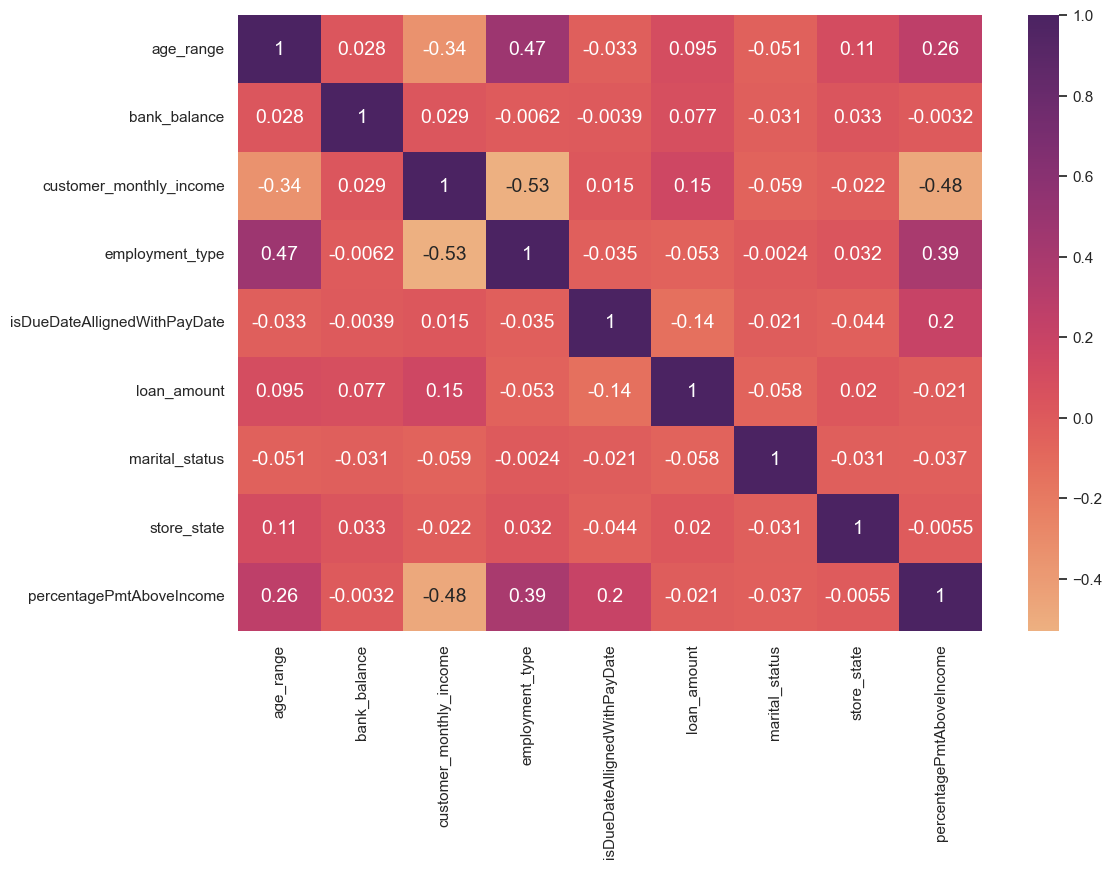

In [19]:
# this is a heatmap or correlation plot to understand the features some more.
# this also is a similarity matrix.
# the internal threshold limit has been set to 0.5. Anything below 0.5 is acceptable. 
# A commonly used threshold is a correlation coefficient (or Pearson's r) of 0.5 or higher, which indicates a moderate to strong linear relationship between variables. 

fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

<Axes: xlabel='age_range', ylabel='count'>

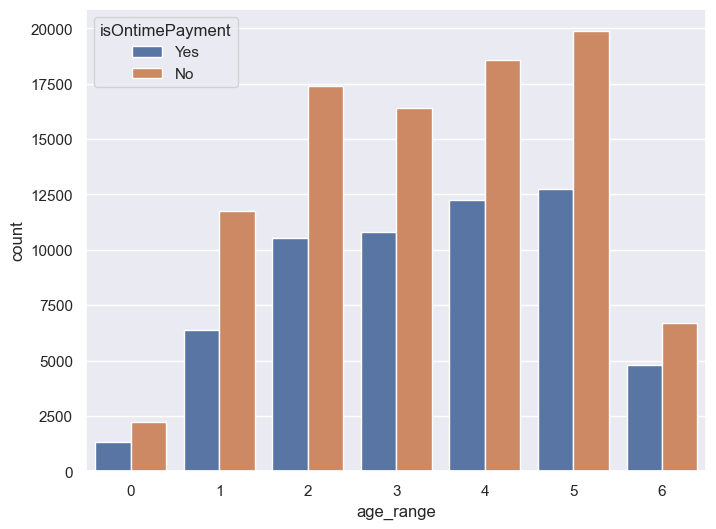

In [20]:
# use subplots to understand the data distribution between age_range and isOntimePayment attribute
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='age_range', hue='isOntimePayment', ax=ax, data=data)

In [21]:
data['isOntimePayment'] = pd.Categorical(data.isOntimePayment)
data['isOntimePayment'] = data['isOntimePayment'].apply(lambda x: 1 if x=="Yes" else 2)
data.isOntimePayment.dtypes

CategoricalDtype(categories=[2, 1], ordered=False)

In [22]:
# Normalize labels: convert features/variables that are categorical and boolean into numerical labels. 
le_c = LabelEncoder()
#data['isOntimePayment'] = le_c.fit_transform(data['isOntimePayment'])
#classes_c = le_c.classes_

data['age_range'] = le_c.fit_transform(data['age_range'])
classes_c = le_c.classes_

#data['gender'] = le_c.fit_transform(data['gender'])
#classes_c = le_c.classes_

data['store_state'] = le_c.fit_transform(data['store_state'])
classes_c = le_c.classes_

data['employment_type'] = le_c.fit_transform(data['employment_type'])
classes_c = le_c.classes_

#data['payment_method'] = le_c.fit_transform(data['payment_method'])
#classes_c = le_c.classes_

In [23]:
data

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
0,3,25.00,5455.92,2,0,100.0,1,0,0.011181,1
1,3,25.00,5455.92,2,0,100.0,1,0,0.011181,2
2,4,395.29,1916.00,2,0,200.0,1,0,0.062792,2
3,4,395.29,1916.00,2,0,200.0,1,0,0.062792,1
4,6,988.23,1269.00,2,0,200.0,2,0,0.094807,2
...,...,...,...,...,...,...,...,...,...,...
151699,2,10.69,5600.00,2,0,530.0,2,4,0.106948,2
151700,4,901.64,3800.00,1,0,600.0,2,4,0.178055,2
151701,3,8.18,1936.00,3,0,300.0,2,4,0.176968,2
151702,3,23.82,803.50,5,0,250.0,2,0,0.365588,2


<Axes: xlabel='isOntimePayment', ylabel='customer_monthly_income'>

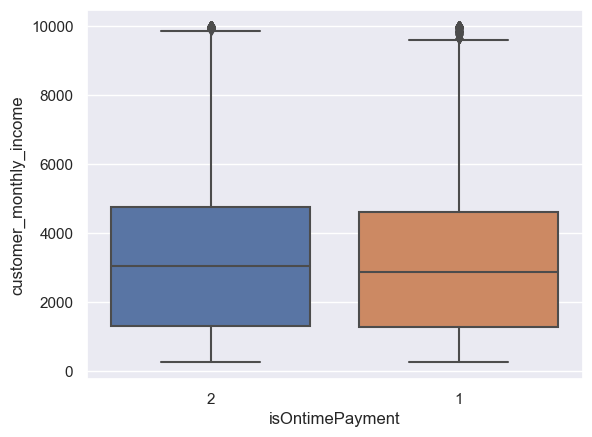

In [24]:
# use box plot to understand the data distribution between customer_monthly_income and isOntimePayment features
sns.boxplot(x ="isOntimePayment",y="customer_monthly_income" ,data = data)

<Axes: xlabel='isOntimePayment', ylabel='marital_status'>

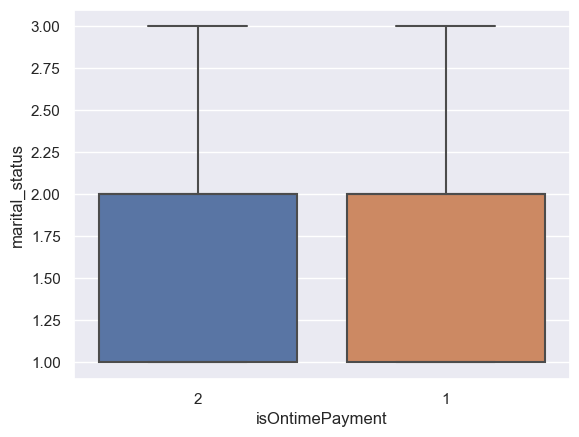

In [25]:
# use box plot to understand the data distribution between marital_status and isOntimePayment features
sns.boxplot(x ="isOntimePayment",y="marital_status" ,data = data)

<Axes: xlabel='isOntimePayment', ylabel='age_range'>

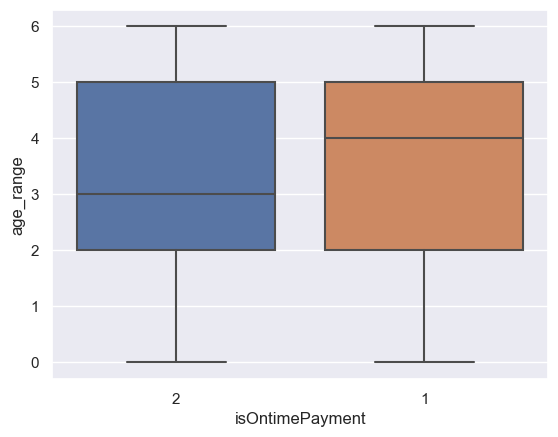

In [26]:
# use box plot to understand the data distribution between age_range and isOntimePayment features
sns.boxplot(x ="isOntimePayment",y="age_range" ,data = data)

<Axes: xlabel='age_range', ylabel='count'>

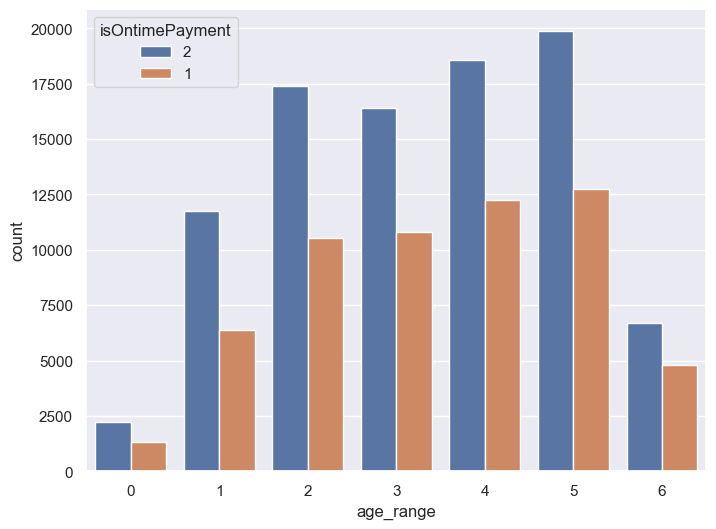

In [27]:
# use sub plot and count plot to understand the data distribution between age_range and isOntimePayment features
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='age_range', hue='isOntimePayment', ax=ax, data=data)

<Axes: xlabel='marital_status', ylabel='count'>

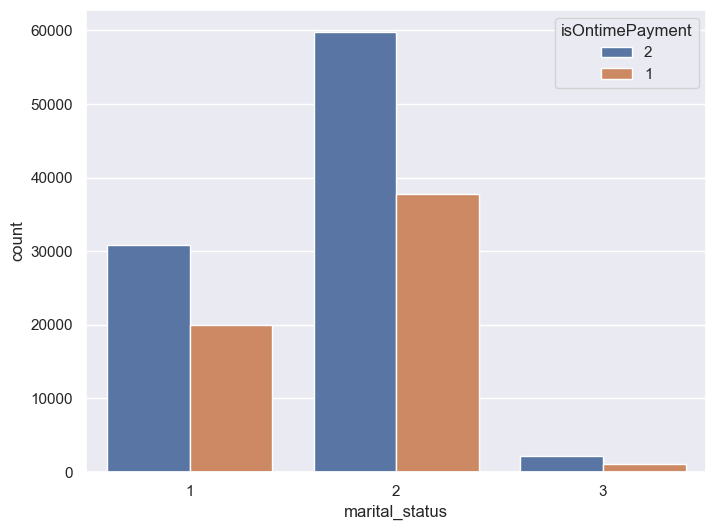

In [28]:
# use sub plot and count plot to understand the data distribution between marital_status and isOntimePayment features
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='marital_status', hue='isOntimePayment', ax=ax, data=data)

<Axes: xlabel='customer_monthly_income', ylabel='count'>

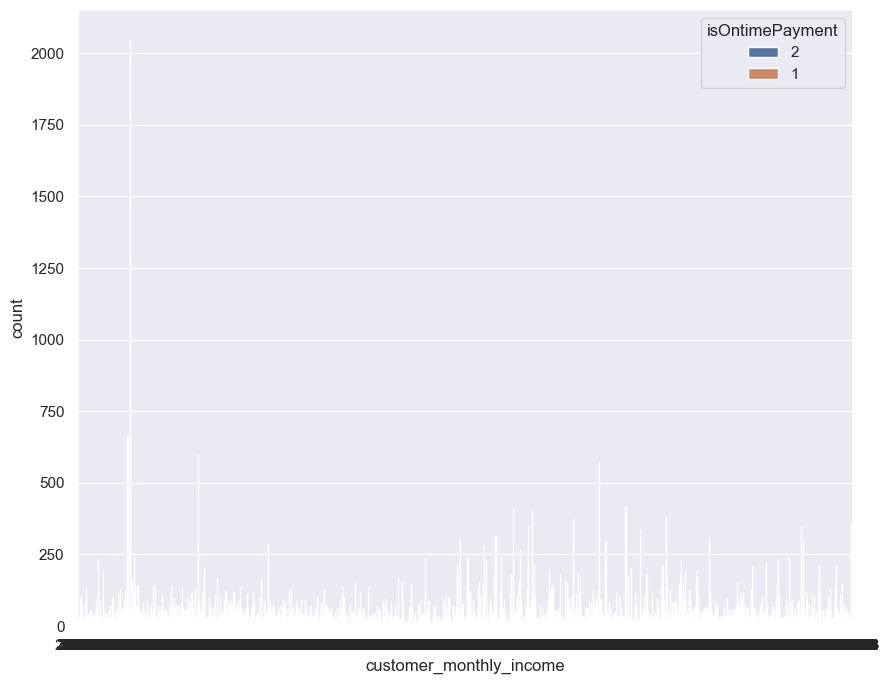

In [29]:
# use subplot and count plot to understand the data distribution between customer_monthly_income and isOntimePayment.
# need to revisit to modify customer income in terms of ranges.
fig, ax = plt.subplots( figsize = (10,8) )
sns.countplot(x='customer_monthly_income', hue='isOntimePayment', ax=ax, data=data)

<Axes: xlabel='isOntimePayment', ylabel='customer_monthly_income'>

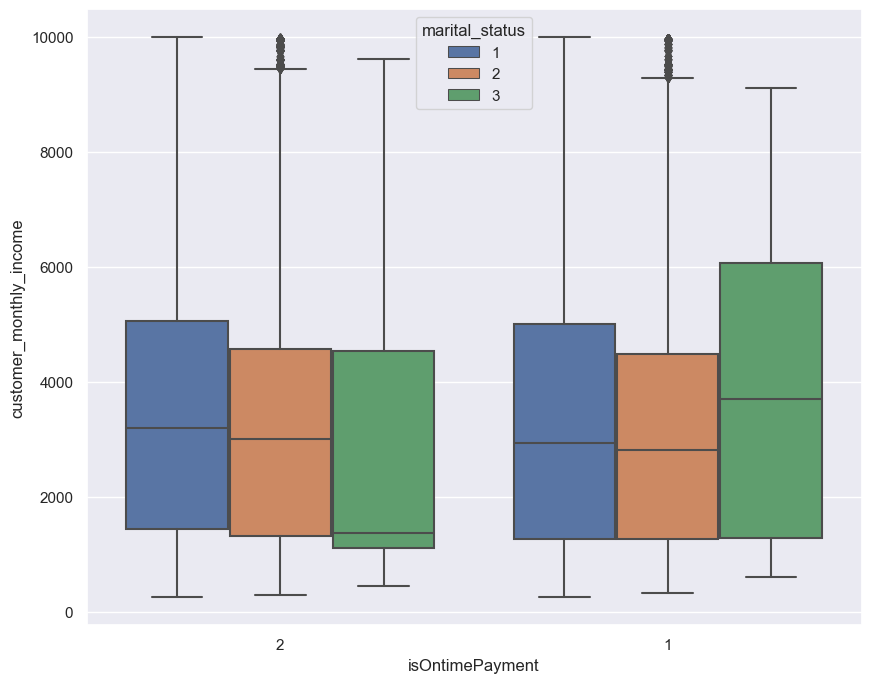

In [30]:
# use subplot and boxplot to understand the data distribution of customer income, marital status 
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "isOntimePayment", y = "customer_monthly_income", hue='marital_status', data = data)

In [31]:
data.describe()

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
count,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000,151704.000000
mean,3.367268,575.079841,3331.127024,3.151519,0.170688,685.860691,1.687371,5.965855,0.087901
std,1.575199,1807.729758,2321.926977,1.357796,0.376237,460.813576,0.509069,1.915957,0.118250
min,0.000000,0.010000,250.040000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000
25%,2.000000,24.950000,1298.000000,2.000000,0.000000,400.000000,1.000000,6.000000,0.018891
50%,3.000000,166.840000,2946.800000,2.000000,0.000000,500.000000,2.000000,6.000000,0.047150
75%,5.000000,607.700000,4726.000000,5.000000,0.000000,900.000000,2.000000,7.000000,0.110947
max,6.000000,47116.330000,9996.000000,5.000000,1.000000,4500.000000,3.000000,13.000000,1.879699


In [32]:
# separate the target variable / class label from the rest of the dataset
x = data.drop("isOntimePayment", axis=1)
y = data["isOntimePayment"]

In [33]:
#split the data into training dataset and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 7)

In [34]:
# libraries needed to build Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [35]:
# building the model
rf_clf = RandomForestClassifier(criterion='gini', n_estimators=6, bootstrap=True, random_state=50)

smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=9)),
                ['classifier',
                 RandomForestClassifier(n_estimators=6, random_state=50)]])

In [36]:
# use the model to predict test dataset
y_pred = pipeline.predict(x_test)
rf_clf.predict(x)


array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [37]:
# print the RFC model accuracy metrics to understand the performance of the model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 75.6002
Precision: 73.5592
F1-Score: 74.5658
Accuracy score: 79.9877
AUC Score: 79.1849


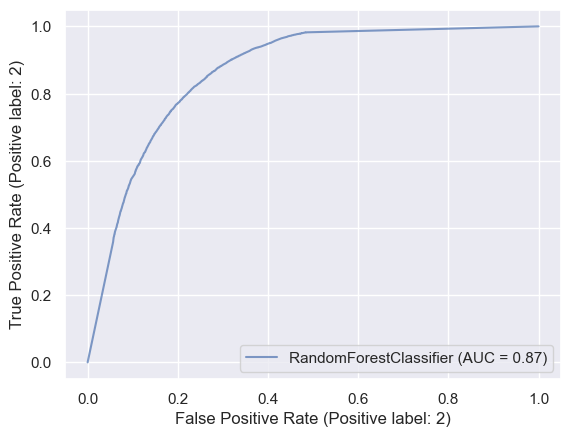

In [38]:
# plot the Area Under the ROC (Receiver Operating Characteristic curve) Curve (AUC) - one of the accuracy metrics
# the more AUC the better - ideal value is 1. bad AUC value is 0
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test, ax=ax, alpha=0.7)

plt.show()

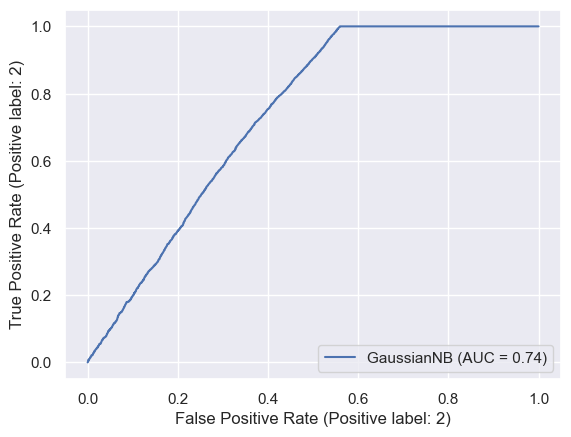

In [39]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
naiveBayes = GaussianNB()

# Train the model using the training sets
naiveBayes.fit(x_train,y_train)
nb_disp = RocCurveDisplay.from_estimator(naiveBayes, x_test, y_test)
plt.show()

In [40]:
# build and train Support Vector Classifier model
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)

SVC()

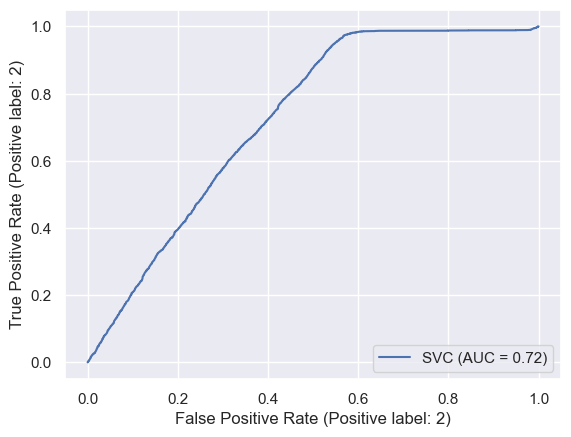

In [41]:
clf_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [42]:
# Import the decision tree model

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [43]:
y_pred = decision_tree.predict(x_test)
y_pred

array([2, 2, 1, ..., 2, 1, 2], dtype=int64)

In [44]:
print("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 78.265072947794)

In [45]:
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_7 <= 7.50
|   |   |--- feature_7 <= 3.50
|   |   |   |--- class: 2
|   |   |--- feature_7 >  3.50
|   |   |   |--- class: 2
|   |--- feature_7 >  7.50
|   |   |--- feature_5 <= 555.00
|   |   |   |--- class: 2
|   |   |--- feature_5 >  555.00
|   |   |   |--- class: 2
|--- feature_4 >  0.50
|   |--- class: 1



In [53]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

In [50]:
#independent_var_data = data.drop(columns=["isOntimePayment"], inplace=True)

#independent_var_data

In [51]:
#independent_var_data

In [47]:
feature_cols = list(x.columns)

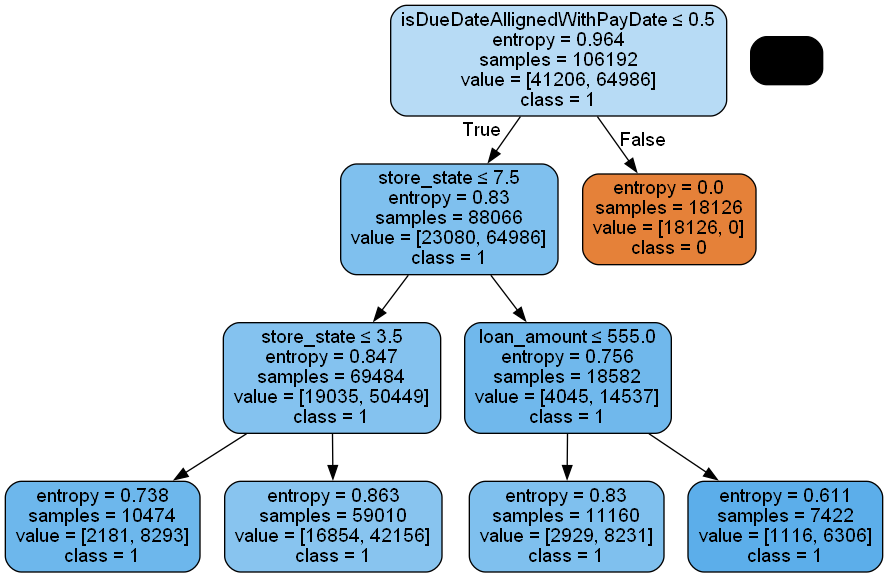

In [48]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ontimePayments.png')
Image(graph.create_png())

In [54]:


#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(decision_tree, feature_names=x.columns, class_names = decision_tree.classes_, filled=True)

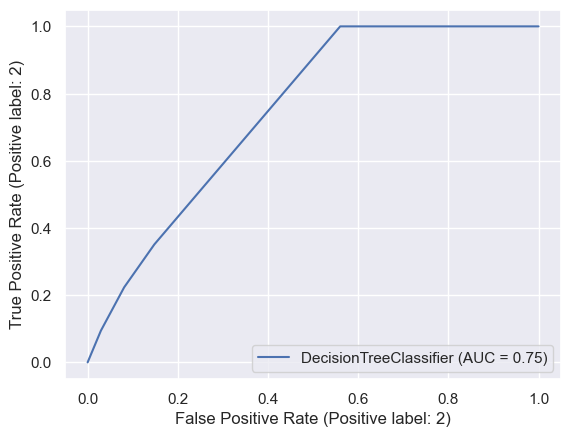

In [49]:
dtree_disp = RocCurveDisplay.from_estimator(decision_tree, x_test, y_test)
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

C:\Users\Soumya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
pred_cv = logistic_reg.predict(x_test)
accuracy_score(y_test,y_pred)

0.7826507294779399

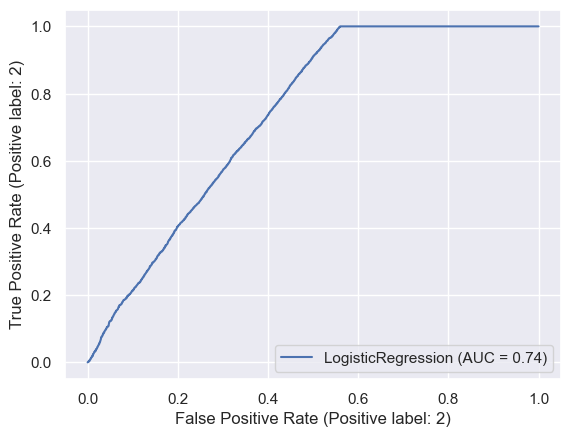

In [52]:
log_reg_disp = RocCurveDisplay.from_estimator(logistic_reg, x_test, y_test)

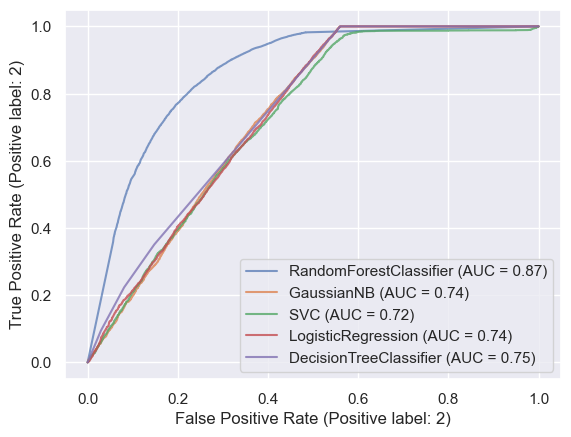

In [53]:
# compare all models's AUC. plot ROC curve
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf_clf, x_test, y_test, ax=ax, alpha=0.7)
nb_disp.plot(ax=ax, alpha=0.8)
clf_disp.plot(ax=ax, alpha=0.8)
log_reg_disp.plot(ax=ax, alpha=0.8)
dtree_disp.plot(ax=ax, alpha=0.8)

plt.show()

In [54]:
# import libraries to save the model as .joblib file
import os
import joblib

#to save the model
joblib.dump(rf_clf, "./random_forest.joblib")

['./random_forest.joblib']

In [55]:
# import libraries to save the model as .pkl file
import pickle

# the wb argument stands for "write binary". This specifies the mode in which the file should be opened, where:
# w: opens the file for writing
# b: specifies that the file should be treated as binary data

with open('rf_clf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

In [56]:
# load, no need to initialize the loaded_rf
# here we are actually using the trained model to predict
loaded_rf = joblib.load("./random_forest.joblib")
loaded_rf.predict(x)

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [57]:
# use the model for predicting unseen / new data
# make sure that the file path is correct here.
unseendata = pd.read_csv('/AI_ML_Project/GITHub/unseenData.csv')
unseendata.head()

,id,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
0,64090,56 to 65,453.43,6224.96,Regular Job,0,500.0,2,NV,0.017531
1,60639,56 to 65,44.31,1240.00,Regular Job,0,400.0,2,NV,0.041355
2,117554,56 to 65,1882.76,5885.04,Self Employed,0,600.0,1,NM,0.018318
3,16518,36 to 45,975.61,4494.16,Regular Job,0,500.0,2,AL,0.130725
4,7252,75 and above,203.62,3700.92,Regular Job,1,400.0,2,MI,0.122837


In [58]:
unseendata

,id,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
0,64090,56 to 65,453.43,6224.96,Regular Job,0,500.0,2,NV,0.017531
1,60639,56 to 65,44.31,1240.00,Regular Job,0,400.0,2,NV,0.041355
2,117554,56 to 65,1882.76,5885.04,Self Employed,0,600.0,1,NM,0.018318
3,16518,36 to 45,975.61,4494.16,Regular Job,0,500.0,2,AL,0.130725
4,7252,75 and above,203.62,3700.92,Regular Job,1,400.0,2,MI,0.122837
...,...,...,...,...,...,...,...,...,...,...
896,59580,46 to 55,614.11,5930.24,Self Employed,0,1000.0,1,NV,0.014939
897,27986,26 to 35,4.25,3736.72,Regular Job,0,500.0,1,OK,0.026826
898,79806,56 to 65,830.71,2921.52,Regular Job,1,600.0,2,NM,0.024114
899,155037,66 to 75,148.49,850.00,Social Security,0,300.0,2,OK,0.083271


In [59]:
unseendata.head()

,id,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
0,64090,56 to 65,453.43,6224.96,Regular Job,0,500.0,2,NV,0.017531
1,60639,56 to 65,44.31,1240.00,Regular Job,0,400.0,2,NV,0.041355
2,117554,56 to 65,1882.76,5885.04,Self Employed,0,600.0,1,NM,0.018318
3,16518,36 to 45,975.61,4494.16,Regular Job,0,500.0,2,AL,0.130725
4,7252,75 and above,203.62,3700.92,Regular Job,1,400.0,2,MI,0.122837


In [60]:
# Normalize labels: convert features/variables that are categorical and boolean into numerical labels. 
le_c = LabelEncoder()
unseendata['age_range'] = le_c.fit_transform(unseendata['age_range'])
classes_c = le_c.classes_

#unseendata['gender'] = le_c.fit_transform(unseendata['gender'])
#classes_c = le_c.classes_

unseendata['store_state'] = le_c.fit_transform(unseendata['store_state'])
classes_c = le_c.classes_

unseendata['employment_type'] = le_c.fit_transform(unseendata['employment_type'])
classes_c = le_c.classes_

#unseendata['payment_method'] = le_c.fit_transform(unseendata['payment_method'])
#classes_c = le_c.classes_

In [61]:
predictData = unseendata.drop(['id'], axis=1)

In [62]:
predictData

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
0,4,453.43,6224.96,1,0,500.0,2,7,0.017531
1,4,44.31,1240.00,1,0,400.0,2,7,0.041355
2,4,1882.76,5885.04,3,0,600.0,1,6,0.018318
3,2,975.61,4494.16,1,0,500.0,2,0,0.130725
4,6,203.62,3700.92,1,1,400.0,2,4,0.122837
...,...,...,...,...,...,...,...,...,...
896,3,614.11,5930.24,3,0,1000.0,1,7,0.014939
897,1,4.25,3736.72,1,0,500.0,1,8,0.026826
898,4,830.71,2921.52,1,1,600.0,2,6,0.024114
899,5,148.49,850.00,4,0,300.0,2,8,0.083271


In [63]:
predictions = loaded_rf.predict(predictData)

In [70]:
#output = pd.DataFrame(output)

In [64]:
predictions

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,

In [65]:
probabilities = rf_clf.predict_proba(predictData)

In [66]:
probabilities

array([[0.5125    , 0.4875    ],
       [0.63510101, 0.36489899],
       [0.72435897, 0.27564103],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667]])

In [67]:
customer_ids = unseendata.iloc[:, 0].values

In [68]:
customer_ids

array([ 64090,  60639, 117554,  16518,   7252,  49721, 119105,  34849,
       105935,  80453,  52681,  14589,  49170,  44650, 159718,  22634,
        96600, 135818,  71370,  27068, 109996, 159578,  73008, 107963,
        17212,  31689,  96249,  16244,  93722, 156597,   6399,  20814,
       136126, 121336, 136939,    672,  11984, 139053, 122725, 168053,
       121039, 123193,  99759, 104254, 127287,  15447, 145876,  68516,
        44892,  60912, 114383,  76630,  52592, 160815, 113069,  91200,
       118055,  83868, 106014, 123431, 144635, 138815,  21025,  54276,
       146309, 119755, 105647,  32171,  88666, 129610, 119000, 106070,
        28676,  30858,  34709, 130969,  28724, 166036, 156412,  26433,
        54604, 163703, 168721, 100455, 121866,  39650,  92170,  57019,
        49004, 126955, 166175, 118168, 139630,  15318,  77908,  68424,
       138263, 155233, 107792,  89551, 146764,  44224, 150322,  39618,
       118786, 161963,  63393, 142077, 134154,  51500,  95431, 160825,
      

In [69]:
output_array = np.column_stack((customer_ids, predictions, probabilities))

In [70]:
output_array

array([[6.40900000e+04, 1.00000000e+00, 5.12500000e-01, 4.87500000e-01],
       [6.06390000e+04, 1.00000000e+00, 6.35101010e-01, 3.64898990e-01],
       [1.17554000e+05, 1.00000000e+00, 7.24358974e-01, 2.75641026e-01],
       ...,
       [7.98060000e+04, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.55037000e+05, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.69088000e+05, 2.00000000e+00, 3.33333333e-01, 6.66666667e-01]])

In [71]:
#sub = pd.concat([test_data.id,pred],axis=1)

In [72]:
#output.to_csv(f"PredictedValues_900V2.csv")
filename = 'PredictedValues_900V2.csv'

In [73]:
# Save the data as a CSV file
np.savetxt(filename, output_array, delimiter=',', header='customer_ids,predictions,probability_ontime,probability_of_not_ontime', fmt='%s,%s,%s,%s')

In [74]:
#determine which feature influenced the most on the target variable
import shap 

In [77]:
explainer = shap.TreeExplainer(rf_clf)

In [78]:
x_test

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
127599,5,26.06,1160.00,3,0,500.0,2,7,0.098276
137991,4,498.33,3461.52,2,0,200.0,1,8,0.015999
7643,4,20.67,550.00,5,1,300.0,1,8,0.628455
68467,4,261.23,1164.00,4,0,300.0,2,6,0.037277
138978,5,784.52,2189.00,5,0,600.0,2,6,0.054701
...,...,...,...,...,...,...,...,...,...
124446,5,0.53,575.00,5,0,700.0,1,8,0.241722
97877,4,19.25,1964.80,2,0,525.0,2,6,0.021921
96282,6,356.15,678.00,5,0,500.0,1,6,0.163540
6005,6,595.51,1432.00,5,1,600.0,2,4,0.472409


In [79]:
data

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome,isOntimePayment
0,3,25.00,5455.92,2,0,100.0,1,0,0.011181,1
1,3,25.00,5455.92,2,0,100.0,1,0,0.011181,2
2,4,395.29,1916.00,2,0,200.0,1,0,0.062792,2
3,4,395.29,1916.00,2,0,200.0,1,0,0.062792,1
4,6,988.23,1269.00,2,0,200.0,2,0,0.094807,2
...,...,...,...,...,...,...,...,...,...,...
151699,2,10.69,5600.00,2,0,530.0,2,4,0.106948,2
151700,4,901.64,3800.00,1,0,600.0,2,4,0.178055,2
151701,3,8.18,1936.00,3,0,300.0,2,4,0.176968,2
151702,3,23.82,803.50,5,0,250.0,2,0,0.365588,2


In [80]:
x_test

,age_range,bank_balance,customer_monthly_income,employment_type,isDueDateAllignedWithPayDate,loan_amount,marital_status,store_state,percentagePmtAboveIncome
127599,5,26.06,1160.00,3,0,500.0,2,7,0.098276
137991,4,498.33,3461.52,2,0,200.0,1,8,0.015999
7643,4,20.67,550.00,5,1,300.0,1,8,0.628455
68467,4,261.23,1164.00,4,0,300.0,2,6,0.037277
138978,5,784.52,2189.00,5,0,600.0,2,6,0.054701
...,...,...,...,...,...,...,...,...,...
124446,5,0.53,575.00,5,0,700.0,1,8,0.241722
97877,4,19.25,1964.80,2,0,525.0,2,6,0.021921
96282,6,356.15,678.00,5,0,500.0,1,6,0.163540
6005,6,595.51,1432.00,5,1,600.0,2,4,0.472409


In [81]:
rf_clf.predict_proba(x_test)
#rf_clf.predict_log_proba(x_test)

array([[0.04761905, 0.95238095],
       [0.19166667, 0.80833333],
       [1.        , 0.        ],
       ...,
       [0.11363636, 0.88636364],
       [1.        , 0.        ],
       [0.47575351, 0.52424649]])

In [82]:
#x_test.loc[[6001]]

In [83]:
# Calculate Shap values
#choosen_instance = x_test.loc[[125497]]
shap_values = explainer.shap_values(x_test)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

NameError: name 'choosen_instance' is not defined

In [ ]:
# Calculate Shap values
#choosen_instance = x_test.loc[[3063]]
#shap_values = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
# Calculate Shap values
#choosen_instance = x_test.loc[[86448]]
#shap_values = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
# Calculate Shap values
#choosen_instance = x_test.loc[[95116]]
#shap_values = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
shap_values = explainer.shap_values(x_test)
shap.initjs()
shap.summary_plot(shap_values, x_train)


In [ ]:
#unseendata.drop(columns=["id"], inplace=True)
unseendata.drop(['id'], axis=1)

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
